In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from   scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Problem1
Wholesale Customers Analysis 

Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [2]:
df_Problem1=pd.read_csv('Wholesale+Customers+Data.csv')
df_Problem1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df_Problem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


* There are 9 columns.
* Two variables are of object datatype and rest 7 are of int dadatype.
* No null values are present.

### Descriptive Statistical summary of data

In [4]:
df_Problem1.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


* The above table provides us the various descriptive statistics of the variables.
* We can check count,mean, median,standard deviation, 5-point summary numerical variables.
* We acn check the count, unique values, mode and frequency of categorical variables.

#### Introducing a column for total spend

In [5]:
df_Problem1['Total_spent']=df_Problem1.drop('Buyer/Spender',axis=1).sum(axis=1)

### "Region" v/s "Total spend"

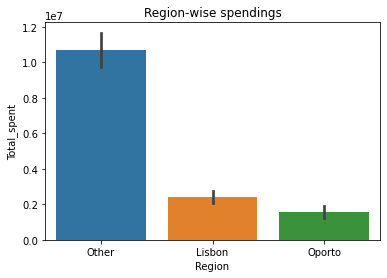

In [6]:
sns.barplot(df_Problem1['Region'],df_Problem1['Total_spent'],estimator=np.sum)
plt.title('Region-wise spendings');

### "Channel" v/s "Total spend"

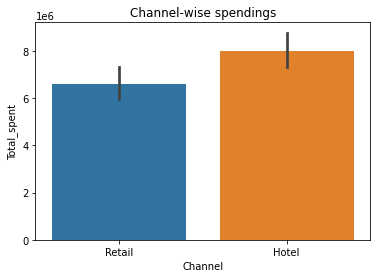

In [7]:
sns.barplot(df_Problem1['Channel'],df_Problem1['Total_spent'],estimator=np.sum)
plt.title('Channel-wise spendings');

### Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

* From the above plots it is clear that;
    * The region "Other" seems to spend more and the region "Oporto" seems to spend less.
    * The channel "Hotel" seems to spend more and the channel "Retail" seems to spend less.

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

### Region wise behaviour of varieties

In [8]:
df_Problem1.head(1)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112


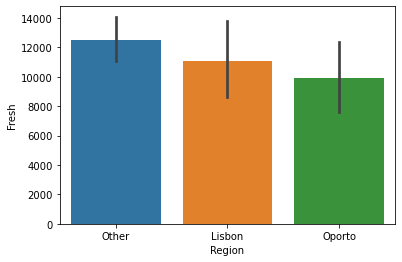

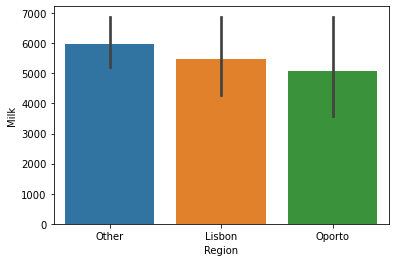

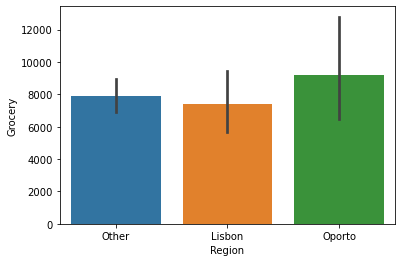

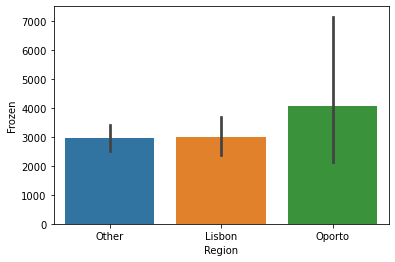

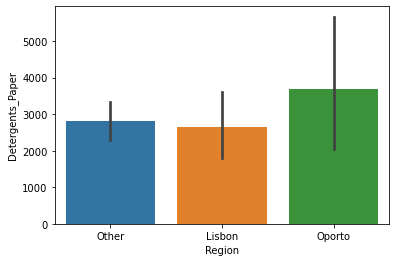

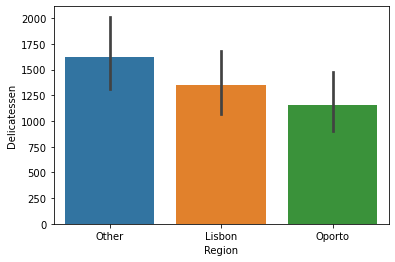

In [9]:
varieties=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for i in varieties:
    sns.barplot(df_Problem1['Region'],df_Problem1[i]);
    plt.show()

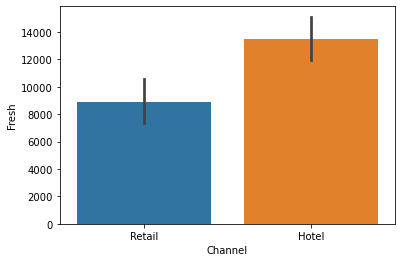

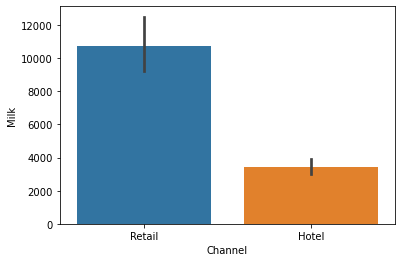

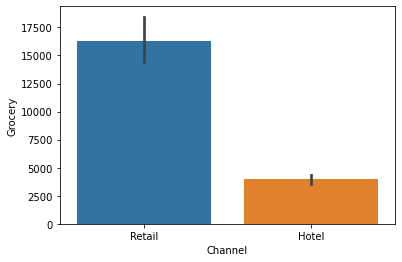

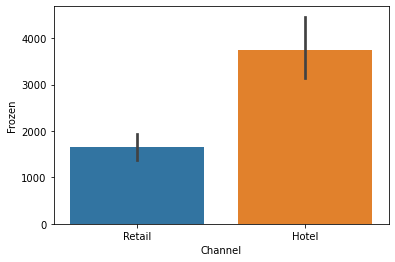

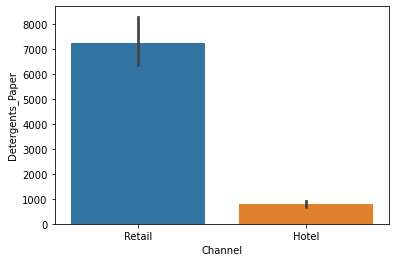

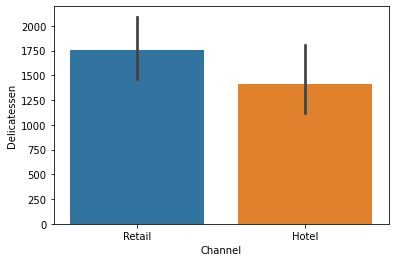

In [10]:
varieties=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for i in varieties:
    sns.barplot(df_Problem1['Channel'],df_Problem1[i]);
    plt.show()

* INFERENCES;
    * The behaviour of varieties across various regions and channels are different.
    * Fresh, Milk and Delicatessen have higher mean sales in 'other' region.
    * Grocery, Frozen and Detergents_Paper have higher mean sales in 'Oporto' region
    * Fresh and Frozen have higher mean sales in 'Hotel' channel and rest of the varieties have higher mean sales in 'Retail' channel. 

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

#### Calculating the Coefficient of variance for all varieties

In [11]:
for i in varieties:
    print('Coefficient of variance for {} is {}'.format(i,round(stats.variation(df_Problem1[i]),2)))

Coefficient of variance for Fresh is 1.05
Coefficient of variance for Milk is 1.27
Coefficient of variance for Grocery is 1.19
Coefficient of variance for Frozen is 1.58
Coefficient of variance for Detergents_Paper is 1.65
Coefficient of variance for Delicatessen is 1.85


* INFERENCES:
    * "Delicatessen" shows the most inconsistent behaviour with Highest coefficient of variance (1.85) 
    * "Fresh" shows the least inconsistent behaviour with lowest coefficient of variance (1.05)

### 1.4 Are there any outliers in the data?

#### Box plots for all the varieties

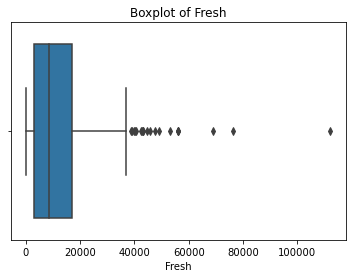

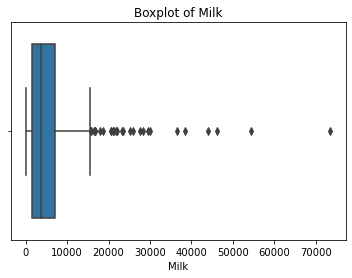

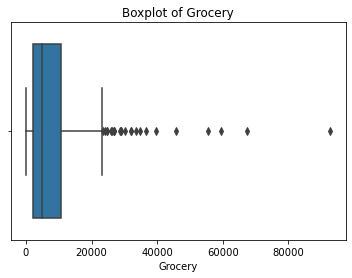

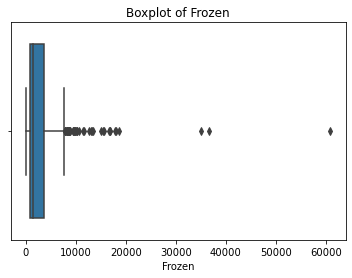

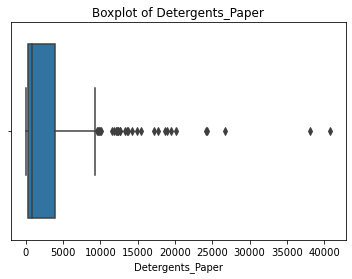

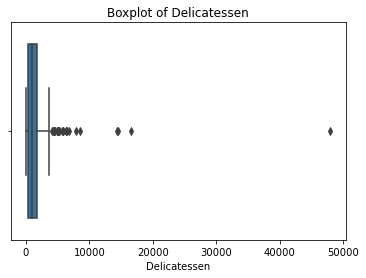

In [12]:
for i in varieties:
    sns.boxplot(df_Problem1[i])
    plt.title('Boxplot of '+ i.title())
    plt.show()

* In the above Box plots we can find a lot of data points having values too large as compared to rest of the data. Hence, Outliers are present in each variety.

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

* Problems/Focus points on the basis of above analysis;
    * The total spent in region "Oporto"  and the channel "Retail" is less.
    * All varieties show different behavior across various Region and Channel. 
    * Fresh and Frozen have lower mean sales in the channel "Retail".
    * The most inconsistent behavior - "Delicatessen"

* Solutions/Recommendations to the business;
    * The wholeseller distributor should try to invesitgate the reasons for less spending in regions for certain varities.
    * Similarly, they should focus on channels with less spendings on certain varities.
    * The inventory for the variety "Delicatessen" shall be maintained accordingly due to its high variability.

# Problem 2 

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

### Loading the data

In [13]:
df_Problem2=pd.read_csv('Survey-1.csv')

### Checking the top 5 rows

In [14]:
df_Problem2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


### 2.1.1. Contingency table for Gender and Major 

In [15]:
pd.crosstab(df_Problem2['Gender'],df_Problem2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Contingency table for Gender and Grad Intention 

In [16]:
pd.crosstab(df_Problem2['Gender'],df_Problem2['Grad Intention'],margins=True )

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Contingency table for Gender and Employment

In [17]:
pd.crosstab(df_Problem2['Gender'],df_Problem2['Employment'],margins=True )

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Contingency table for Gender and Computer

In [18]:
pd.crosstab(df_Problem2['Gender'],df_Problem2['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [19]:
# From contingency table 2.1.1
total_number_of_male_students=29
total_number_of_students=62
print('Probability that a randomly selected CMSU student will be male is {}%'.format
      (round(total_number_of_male_students*100/total_number_of_students,2)))

Probability that a randomly selected CMSU student will be male is 46.77%


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [20]:
# From contingency table 2.1.1
total_number_of_female_students=33
total_number_of_students=62
print('Probability that a randomly selected CMSU student will be female is {}%'.format
      (round(total_number_of_female_students*100/total_number_of_students,2)))

Probability that a randomly selected CMSU student will be female is 53.23%


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

##### Using the above Contingency table for Gender and Major from 2.1.1
Probability of a major among the male students in CMSU = Number of male students for major/Total number of male students

In [21]:
different_majors_among_male_students=pd.crosstab(df_Problem2['Gender'],df_Problem2['Major'])
for i,j in enumerate(different_majors_among_male_students.columns):
    print('Probability of {} among male students is {}%'.
          format(j,round(different_majors_among_male_students.iloc[1,i]*100/29,2)))   

Probability of Accounting among male students is 13.79%
Probability of CIS among male students is 3.45%
Probability of Economics/Finance among male students is 13.79%
Probability of International Business among male students is 6.9%
Probability of Management among male students is 20.69%
Probability of Other among male students is 13.79%
Probability of Retailing/Marketing among male students is 17.24%
Probability of Undecided among male students is 10.34%


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [22]:
different_majors_among_female_students=pd.crosstab(df_Problem2['Gender'],df_Problem2['Major'])
for i,j in enumerate(different_majors_among_female_students.columns):
    print('Probability of {} among female students is {}%'.
          format(j,round(different_majors_among_female_students.iloc[0,i]*100/33,2)))  

Probability of Accounting among female students is 9.09%
Probability of CIS among female students is 9.09%
Probability of Economics/Finance among female students is 21.21%
Probability of International Business among female students is 12.12%
Probability of Management among female students is 12.12%
Probability of Other among female students is 9.09%
Probability of Retailing/Marketing among female students is 27.27%
Probability of Undecided among female students is 0.0%


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [23]:
# Using above Contingency table for Gender and Grad Intention 2.1.2
#The probability that a randomly chosen student is a male and intends to graduate= 
#(Male and Yes)/ Total number of students

print('Probability that a randomly chosen student is a male and intends to graduate is',
      round(17/62*100,2),'%')

Probability that a randomly chosen student is a male and intends to graduate is 27.42 %


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [24]:
# Using above Contingency table for Gender and Computer 2.1.4 
#The probability that a randomly selected student is a female and does NOT have a laptop= 
#(female and No)/ Total number of students

print('The probability that a randomly selected student is a female and does NOT have a laptop',
      round(4/62*100,2),'%')

The probability that a randomly selected student is a female and does NOT have a laptop 6.45 %


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:


### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [25]:
# Using above Contingency table for Gender and Employment 2.1.3
# The probability that a randomly chosen student is either a male or has full-time employment= 
# P(Male)+ P(Full Time Employment)- P(Male ∩ Full Time Employment)

print('Probability that a randomly chosen student is either a male or has full-time employment is',
      round(((29/62)+(10/62)-(7/62))*100,2),"%")

Probability that a randomly chosen student is either a male or has full-time employment is 51.61 %


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management

In [26]:
pd.crosstab(df_Problem2['Gender'],df_Problem2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [27]:
# Using above Contingency table for Gender and Major 2.1.1
# The conditional probability that given a female student is randomly chosen, she is majoring in 
# international business or management i.e P(International Business OR Management|Female)=
# P(Female|International Business OR Management)* P(International Business OR Management)/P(Female)

print('Probability that given a female student is randomly chosen, she is majoring in international business or management is',
      round((8/33)*(16/62)/(33/62)*100,2),"%")

Probability that given a female student is randomly chosen, she is majoring in international business or management is 11.75 %


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [28]:
Gender_and_IntenttoGraduate=pd.crosstab(df_Problem2['Gender'],df_Problem2['Grad Intention'] )
Gender_and_IntenttoGraduate.drop(['Undecided'], axis = 1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [29]:
# For graduate intention and being female to be  independent events, 
# P(Female ∩ Yes) = P(Female) * P(Yes)

print('Probability of Female ∩ Yes is',round(11/40*100,2),"%")
print('Probability of Female * Probability of Yes is ',round((20/40)*(28/40)*100,2),"%")

Probability of Female ∩ Yes is 27.5 %
Probability of Female * Probability of Yes is  35.0 %


* Since, P(Female ∩ Yes) is not equal to  P(Female) * P(Yes), hence these are NOT independent events

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?



* The probability of a randomly chosen students with GPA less than 3 = Total Students having GPA<3/Total Students

In [30]:
print('The probability of a randomly chosen students with GPA less than 3 is',
      round(len(df_Problem2[df_Problem2['GPA']<3])/62*100,2),"%")

The probability of a randomly chosen students with GPA less than 3 is 27.42 %


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


* The conditional probability that a randomly selected male earns 50 or more = The total count of males having salary 50 or more/ Total number of males

In [31]:
print('The probability of a randomly chosen male earning more than or equal to 50 is',
      round(df_Problem2[(df_Problem2['Gender']=='Male') & (df_Problem2['Salary']>=50)].count()[0]/29*100,2),"%")

The probability of a randomly chosen male earning more than or equal to 50 is 48.28 %


* The conditional probability that a randomly selected female earns 50 or more = The total count of females having salary 50 or more/ Total number of females

In [32]:
print('The probability of a randomly chosen female earning more than or equal to 50 is',
      round(df_Problem2[(df_Problem2['Gender']=='Female') & (df_Problem2['Salary']>=50)].count()[0]/33*100,2),"%")

The probability of a randomly chosen female earning more than or equal to 50 is 54.55 %


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

#### Plotting Distribution plots for GPA, Salary, Spending, and Text Messages

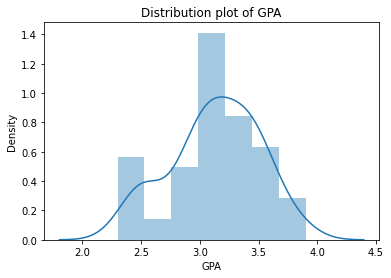

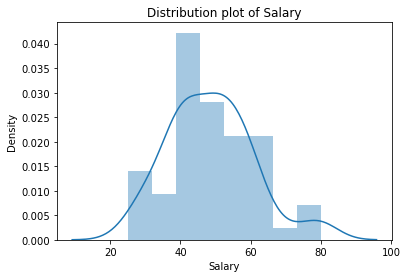

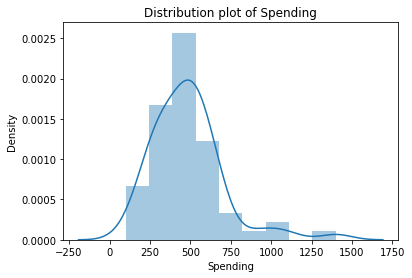

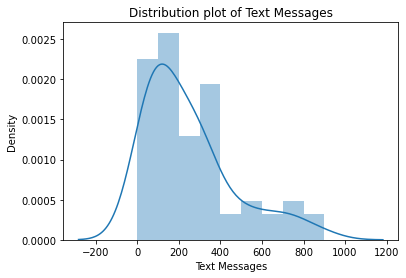

In [33]:
continuous_var=['GPA','Salary','Spending','Text Messages']
for i in continuous_var:
    sns.distplot(df_Problem2[i])
    plt.title('Distribution plot of {}'.format(i))
    plt.show()

#### Calculating Mean, Median and Mode for GPA, Salary, Spending, and Text Messages

In [34]:
for i in continuous_var:
    print('The mean, median and mode for {} is {},{},{}'.
          format(i,df_Problem2[i].mean(),df_Problem2[i].median(),df_Problem2[i].mode()))
    

The mean, median and mode for GPA is 3.129032258064516,3.1500000000000004,0    3.0
1    3.1
2    3.4
dtype: float64
The mean, median and mode for Salary is 48.54838709677419,50.0,0    40.0
dtype: float64
The mean, median and mode for Spending is 482.01612903225805,500.0,0    500
dtype: int64
The mean, median and mode for Text Messages is 246.20967741935485,200.0,0    300
dtype: int64


##### It is clear from the above plots and values of mean, median and mode that;
   1. The mean ,meadian and mode are nearly equal so the distribution is Normal for 'GPA'.
   2. The mean and meadian nearly equal, but mode differs slightly so the distribution is nearly Normal for 'Salary'.
   3. The meadian and mode are equal and mean is also nearly equal so the distribution is Normal for 'Spending '.
   4. The mean, median and mode differs a lot so the distribution is NOT Normal for 'Text Messages '
   
   

# Problem 3 

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [35]:
df_Problem3=pd.read_csv('A+&+B+shingles.csv')
df_Problem3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


* Checking for null values


In [36]:
df_Problem3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


* There are 5 null values in sample 'B'

In [37]:
df_Problem3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### This is problem of One sample t-test for both samples

#### Step 1: Define null and alternative hypotheses

In testing the means moisture contents.

* Null hypothesis states that the mean moisture contents is <= 0.35 pound per 100 square feet
* Alternative hypothesis states that the mean moisture contents is > 0.35 pound per 100 square feet

* $H_0$: $\mu$ <= 0.35
* $H_A$: $\mu$ > 0.35

#### Step 2: Decide the significance level

* Here we select $\alpha$ = 0.05

#### Step 3: Identify the test statistic

* We do not know the population standard deviation and n = 36. So we use the t-distribution and the $t_{STAT}$ test statistic.

#### Step 4: Calculate the p - value and test statistic for Sample "A"

In [38]:
t_statistic, p_value = ttest_1samp(df_Problem3['A'], 0.35,alternative='greater')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.9252236685509249 


#### Step 5: Decide to reject or accept null hypothesis For Sample "A"

In [39]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value > alpha_value: 
    print('We have no enough evidence to reject the null hypothesis since p value > Level of significance')
else:
    print('We have evidence to reject the null hypothesis since p value < Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no enough evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.9252236685509249


* Conclusion
    * The statistical decision is failing to reject the null hypothesis at 5% level of significance.
    * Hence,at 95% confidence level, there is no sufficient evidence to prove that mean moisture contents is greater 0.35 pound per 100 square feet

#### Step 1, Step 2 and Step 3 are same for Sample "B"

#### Step 4: Calculate the p - value and test statistic for Sample "B"

In [40]:
t_statistic, p_value = ttest_1samp(df_Problem3.B.dropna(), 0.35,alternative='greater')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.9979095225996808 


#### Step 5 Decide to reject or accept null hypothesis For Sample "B"

In [41]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value > alpha_value: 
    print('We have no enough evidence to reject the null hypothesis since p value > Level of significance')
else:
    print('We have evidence to reject the null hypothesis since p value < Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no enough evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.9979095225996808


* Conclusion
    * The statistical decision is failing to reject the null hypothesis at 5% level of significance.
    * Hence,at 95% confidence level, there is no sufficient evidence to prove that mean moisture contents is greater 0.35 pound per 100 square feet

### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

* Assumptions to be checked before the test:
    * The variables follow continuous distribution.
    * The samples are randomly selected from population.
    * As we are going to conduct a two-sampled t-test so the population variance of two distributions is equal.

### Step 1: Define null and alternative hypotheses

In testing whether population mean for shingles A and B are equal, 
* the null hypothesis states that the population mean are the same, $\mu{A}$ equals $\mu{B}$. 
* The alternative hypothesis states that thepopulation mean for shingles A and B are different, $\mu{A}$ is not equal to $\mu{B}$.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 i.e        $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 i.e      $\mu{A}$ $\neq$ $\mu{B}$

### Step 2: Decide the significance level


Here we select 
𝛼
α
= 0.05 and the population standard deviation is not known.

### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are same.
* The sample is large sample, n > 30. So we use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.


### Step 4: Calculate the p - value and test statistic

We assume that the variance is equal and compute the necessary statistical values.

In [42]:
t_statistic, p_value  = ttest_ind(df_Problem3['A'],df_Problem3['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)  

tstat 1.2896282719661123
P Value 0.2017496571835306


## Step 5:  Decide to reject or accept null hypothesis

In [43]:
print ("two-sample t-test p-value=", p_value)
alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean for shingles A and B are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean for shingles A and B are same.')

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population mean for shingles A and B are same.


# THANKS!!!!!!!